More often we want to transform time series to aggregate statistics by resampling. For example, original time series recorded in ** second ** will be sampling in ** minute **. For monthly sales of cars, we may want to aggregate data in season that may  exhibit in the last years or in future. Common techniques are   
* Resampling time  series data   
* group by   
* calculating moving statistics   



In [1]:
import os
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
os.chdir("C:/e-books/Practical-Time-Series-Analysis/DataFiles")

In [5]:
df = pd.read_csv("chemical-concentration-readings.csv")
print("shape ",df.shape)
df.head()

shape  (197, 2)


,Timestamp,Chemical conc.
0,1975-01-01 00:00:00,17.0
1,1975-01-01 02:00:00,16.6
2,1975-01-01 04:00:00,16.3
3,1975-01-01 06:00:00,16.1
4,1975-01-01 08:00:00,17.1


We will convert the ** bi-hourly ** observations of original time serires to ** daily ** averages.

In [6]:
datetime_rowid = df['Timestamp'].map(lambda t: pd.to_datetime(t, format='%Y-%m-%d %H:%M:%S'))
df.index = datetime_rowid
df.head()

,Timestamp,Chemical conc.
Timestamp,,
1975-01-01 00:00:00,1975-01-01 00:00:00,17.0
1975-01-01 02:00:00,1975-01-01 02:00:00,16.6
1975-01-01 04:00:00,1975-01-01 04:00:00,16.3
1975-01-01 06:00:00,1975-01-01 06:00:00,16.1
1975-01-01 08:00:00,1975-01-01 08:00:00,17.1


## Resampling (in daily period) technique

In [7]:
daily = df['Chemical conc.'].resample('D')
daily_mean = daily.mean()

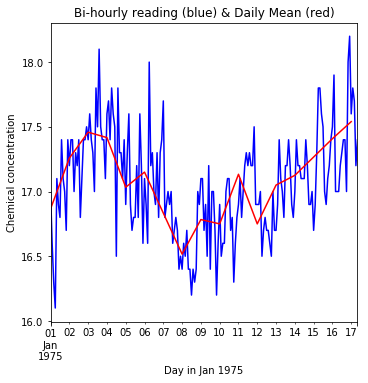

In [8]:
fig = plt.figure(figsize=(5.5,5.5))
ax = fig.add_subplot(1,1,1)
df['Chemical conc.'].plot(ax=ax, color='b')
daily_mean.plot(ax=ax, color='r')
ax.set_title('Bi-hourly reading (blue) & Daily Mean (red)')
ax.set_xlabel('Day in Jan 1975')
ax.set_ylabel('Chemical concentration')
plt.savefig('C:/e-books/Practical-Time-Series-Analysis/B07.png',format='png',dpi=300)

## Group by technique

One way is grouping data. For example, the original time series has monthly patterns that repeat every year. We can verify by calculating month wise avarage. This is done by grouping data into 12 months and then computing average for each month. We load other dataset.

In [16]:
df = pd.read_csv('C:/e-books/Practical-Time-Series-Analysis/DataFiles/mean-daily-temperature-fisher-river.csv')
df.index = df['Date'].map(lambda d: pd.to_datetime(d, format = '%Y-%m-%d'))
#Display shape of the DataFrame
print('Shape of dataframe:', df.shape)

Shape of dataframe: (1461, 2)


In [17]:
df.head(10)

,Date,Mean temparature
Date,,
1988-01-01,1988-01-01,-23.00
1988-01-02,1988-01-02,-20.50
1988-01-03,1988-01-03,-22.00
1988-01-04,1988-01-04,-30.50
1988-01-05,1988-01-05,-31.00
1988-01-06,1988-01-06,-27.50
1988-01-07,1988-01-07,-26.25
1988-01-08,1988-01-08,-26.50
1988-01-09,1988-01-09,-23.00


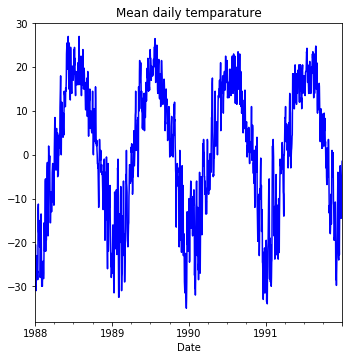

In [19]:
#Plot original time series on daily mean temparature
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)

df['Mean temparature'].plot(ax=ax, color='b')

ax.set_title('Mean daily temparature')

plt.savefig('C:/e-books/Practical-Time-Series-Analysis/B07887_02_03.png', format='png', dpi=300)

In [20]:
#We need to groupby the data for every month and find aggregate statistics
df['Month_Year'] = df.index.map(lambda d: d.strftime('%m-%Y'))

## Group by technique

In [22]:
import numpy as np
monthly_stats = df.groupby(by ='Month_Year')['Mean temparature'].aggregate([np.mean,np.median,np.std])
monthly_stats.reset_index(inplace =True)
monthly_stats.head(10)

,Month_Year,mean,median,std
0,01-1988,-22.137097,-23.00,5.260640
1,01-1989,-17.129032,-18.00,8.250725
2,01-1990,-15.112903,-12.00,6.606764
3,01-1991,-23.038710,-24.50,7.095570
4,02-1988,-19.025862,-19.50,8.598522
5,02-1989,-19.267857,-19.25,8.092042
6,02-1990,-17.482143,-16.50,8.018477
7,02-1991,-10.967857,-12.15,8.220753
8,03-1988,-8.258065,-9.25,5.341459
9,03-1989,-12.508065,-9.50,8.289925


In [23]:
#Let's create month and year columns and sort by them to reorder the rows
monthly_stats['Year'] = monthly_stats['Month_Year']\
                        .map(lambda m: pd.to_datetime(m, format='%m-%Y').strftime('%Y'))
monthly_stats['Month'] = monthly_stats['Month_Year']\
                        .map(lambda m: pd.to_datetime(m, format='%m-%Y').strftime('%m'))
monthly_stats.sort_values(by=['Year', 'Month'], inplace=True)
monthly_stats.head(10)

,Month_Year,mean,median,std,Year,Month
0,01-1988,-22.137097,-23.000,5.260640,1988,01
4,02-1988,-19.025862,-19.500,8.598522,1988,02
8,03-1988,-8.258065,-9.250,5.341459,1988,03
12,04-1988,2.641667,1.875,5.057720,1988,04
16,05-1988,11.290323,11.000,6.254364,1988,05
20,06-1988,19.291667,19.000,3.909032,1988,06
24,07-1988,19.048387,18.500,3.073692,1988,07
28,08-1988,17.379032,18.000,3.183205,1988,08
32,09-1988,10.675000,10.750,3.880294,1988,09
36,10-1988,2.467742,3.000,6.697245,1988,10


In [24]:
#Let's set the Month_Year as the row index
monthly_stats.index = monthly_stats['Month_Year']

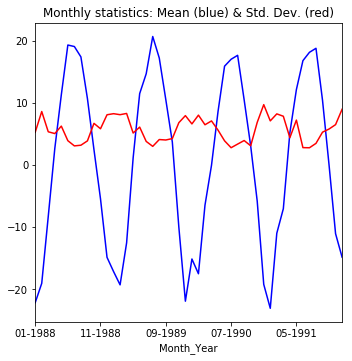

In [25]:
#Plot original time series and daily mean
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)

monthly_stats['mean'].plot(ax=ax, color='b')
monthly_stats['std'].plot(ax=ax, color='r')

ax.set_title('Monthly statistics: Mean (blue) & Std. Dev. (red)')

plt.savefig('C:/e-books/Practical-Time-Series-Analysis/B07887_02_04.png', format='png', dpi=300)

## Moving average statistic

In [26]:
#Now we will calculate weekly moving average on the original time series of mean daily temparature
weekly_moving_average = df['Mean temparature'].rolling(7).mean()

In [27]:
#Now we will calculate monthly moving average on the original time series of mean daily temparature
monthly_moving_average = df['Mean temparature'].rolling(30).mean()

In [28]:
#Let's caluclate the weekly and monthly avergaes with a stride of length 2
weekly_moving_average_2stride = df['Mean temparature'].rolling(7).mean()[::2]
monthly_moving_average_2stride = df['Mean temparature'].rolling(30).mean()[::2]

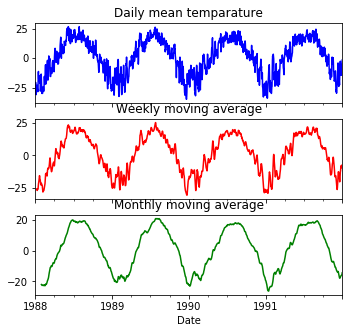

In [30]:
#Plot original time series and weekly moving average
fig, axarr = plt.subplots(3, sharex=True)
fig.set_size_inches(5.5, 5,5)

df['Mean temparature'].plot(ax=axarr[0], color='b')
axarr[0].set_title('Daily mean temparature')

weekly_moving_average.plot(ax=axarr[1], color='r')
axarr[1].set_title('Weekly moving average')

monthly_moving_average.plot(ax=axarr[2], color='g')
axarr[2].set_title('Monthly moving average')

plt.savefig('C:/e-books/Practical-Time-Series-Analysis/B07887_02_05.png', format='png', dpi=300)